In [65]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [66]:
# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
print(data.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [67]:
# Drop unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Renaming columns for clarity
data = data.rename(columns={"v1": "label", "v2": "text"})
print(data.head(10))
# Convert labels to binary values (0 for ham, 1 for spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [68]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [69]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [70]:
# Training Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [71]:
# Training Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [72]:
# Training Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

SVC()

In [73]:
# Predictions
nb_pred = nb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)
svm_pred = svm_model.predict(X_test_tfidf)

In [74]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [75]:
# Evaluate Naive Bayes model
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)
nba=nb_accuracy
print("Naive Bayes Model:")
print(f"Accuracy: {nb_accuracy:.4f}, Precision: {nb_precision:.4f}, Recall: {nb_recall:.4f}, F1-score: {nb_f1:.4f}")


Naive Bayes Model:
Accuracy: 0.9668, Precision: 1.0000, Recall: 0.7533, F1-score: 0.8593


In [76]:
# Evaluate Logistic Regression model
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, lr_pred)
lra=lr_accuracy
print("\nLogistic Regression Model:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-score: {lr_f1:.4f}")


Logistic Regression Model:
Accuracy: 0.9525, Precision: 0.9709, Recall: 0.6667, F1-score: 0.7905


In [77]:
# Evaluate Support Vector Machine (SVM) model
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(y_test, svm_pred)
svmr=svm_accuracy
print("\nSupport Vector Machine (SVM) Model:")
print(f"Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-score: {svm_f1:.4f}")


Support Vector Machine (SVM) Model:
Accuracy: 0.9767, Precision: 0.9921, Recall: 0.8333, F1-score: 0.9058


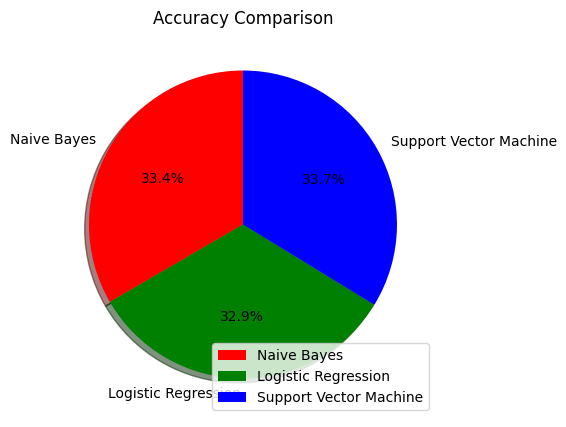

In [78]:
sum = nba + lra + svmr
portion1 = (nba/sum)
portion2 = (lra/sum)
portion3 = (svmr/sum)
labels = ['Naive Bayes','Logistic Regression','Support Vector Machine']
sizes = [portion1, portion2, portion3]
colors=['red','green','blue']
# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow = True, colors=colors)
plt.title('Accuracy Comparison')
plt.legend()
plt.show()